<h2><b>Step:1</b> - Import libraries</h2>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random
from datetime import datetime
plt.style.use('default')
sns.set_palette("husl")

<h2><b> Step: 2</b>-  Agricultural DataAnalyzer class </h2>

In [47]:
class AgriculturalDataAnalyzer:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.numerical_cols = self.df.select_dtypes(include=[np.number]).columns.tolist()
        self.categorical_cols = self.df.select_dtypes(include=['object']).columns.tolist()
        
    def display_basic_info(self):
        print("=" * 50)
        print("AGRICULTURAL DATA ANALYSIS")
        print("=" * 50)
        print(f"Dataset Shape: {self.df.shape[0]} rows, {self.df.shape[1]} columns")
        print("\nFirst 5 rows:")
        print(self.df.head())
        
        print("\nDataset Information:")
        print(self.df.info())
        
        print("\nBasic Statistics for Numerical Columns:")
        print(self.df.describe())
        
        print("\nCategorical Variables Summary:")
        for col in self.categorical_cols:
            print(f"\n{col}:")
            print(self.df[col].value_counts())
    
    def analyze_crop_performance(self):
        print("\n" + "="*50)
        print("CROP PERFORMANCE ANALYSIS")
        print("="*50)
        
        # Yield by Crop Type
        crop_yield = self.df.groupby('Crop_Type')['Yield(kg/ha)'].agg(['mean', 'median', 'std'])
        crop_yield.columns = ['Average Yield', 'Median Yield', 'Yield Std Dev']
        print("\nYield by Crop Type (kg/ha):")
        print(crop_yield.round(2))
        
        # Profit by Crop Type
        crop_profit = self.df.groupby('Crop_Type')['Profit(USD/ha)'].agg(['mean', 'median', 'std'])
        crop_profit.columns = ['Average Profit', 'Median Profit', 'Profit Std Dev']
        print("\nProfit by Crop Type (USD/ha):")
        print(crop_profit.round(2))
        
        # Yield by Region
        region_yield = self.df.groupby('Region')['Yield(kg/ha)'].agg(['mean', 'median', 'std'])
        region_yield.columns = ['Average Yield', 'Median Yield', 'Yield Std Dev']
        print("\nYield by Region (kg/ha):")
        print(region_yield.round(2))
        
        # Yield by Farming Practice
        practice_yield = self.df.groupby('Farming_Practice')['Yield(kg/ha)'].agg(['mean', 'median', 'std'])
        practice_yield.columns = ['Average Yield', 'Median Yield', 'Yield Std Dev']
        print("\nYield by Farming Practice (kg/ha):")
        print(practice_yield.round(2))
    
    def analyze_sustainability(self):
        print("\n" + "="*50)
        print("SUSTAINABILITY ANALYSIS")
        print("="*50)
        
        # Carbon emissions by farming practice
        carbon_emissions = self.df.groupby('Farming_Practice')['Carbon_Emissions(kgCO2eq/ha)'].mean()
        print("Average Carbon Emissions by Farming Practice (kg CO₂eq/ha):")
        print(carbon_emissions.round(2))
        
        # Biodiversity score by farming practice
        biodiversity = self.df.groupby('Farming_Practice')['Biodiversity_Score'].mean()
        print("\nAverage Biodiversity Score by Farming Practice:")
        print(biodiversity.round(2))
        
        # Water use efficiency by crop type
        water_efficiency = self.df.groupby('Crop_Type')['Water_Use_Efficiency(kg/L)'].mean()
        print("\nAverage Water Use Efficiency by Crop Type (kg/L):")
        print(water_efficiency.round(2))
    
    def analyze_correlations(self):
        print("\n" + "="*50)
        print("CORRELATION ANALYSIS")
        print("="*50)
        
        # Select only numerical columns for correlation
        numerical_df = self.df.select_dtypes(include=[np.number])
        
        # Calculate correlation matrix
        corr_matrix = numerical_df.corr()
        
        # Find top correlations with yield
        yield_correlations = corr_matrix['Yield(kg/ha)'].sort_values(ascending=False)
        print("Correlations with Yield:")
        for idx, value in yield_correlations.items():
            if idx != 'Yield(kg/ha)':  # Skip self-correlation
                print(f"{idx}: {value:.3f}")
        
        # Find top correlations with profit
        profit_correlations = corr_matrix['Profit(USD/ha)'].sort_values(ascending=False)
        print("\nCorrelations with Profit:")
        for idx, value in profit_correlations.items():
            if idx != 'Profit(USD/ha)':  # Skip self-correlation
                print(f"{idx}: {value:.3f}")
    
    def create_visualizations(self):
        print("\n" + "="*50)
        print("CREATING VISUALIZATIONS")
        print("="*50)
        
        # Set up the figure
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Agricultural Data Analysis', fontsize=16)
        
        # Plot 1: Yield by Crop Type
        crop_yield = self.df.groupby('Crop_Type')['Yield(kg/ha)'].mean().sort_values(ascending=False)
        axes[0, 0].bar(crop_yield.index, crop_yield.values)
        axes[0, 0].set_title('Average Yield by Crop Type')
        axes[0, 0].set_ylabel('Yield (kg/ha)')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Plot 2: Profit by Region
        region_profit = self.df.groupby('Region')['Profit(USD/ha)'].mean().sort_values(ascending=False)
        axes[0, 1].bar(region_profit.index, region_profit.values, color=['#4c72b0', '#55a868', '#c44e52', '#8172b2'])
        axes[0, 1].set_title('Average Profit by Region')
        axes[0, 1].set_ylabel('Profit (USD/ha)')
        
        # Plot 3: Carbon Emissions by Farming Practice
        practice_carbon = self.df.groupby('Farming_Practice')['Carbon_Emissions(kgCO2eq/ha)'].mean()
        axes[1, 0].bar(practice_carbon.index, practice_carbon.values, color=['#4c72b0', '#55a868', '#c44e52'])
        axes[1, 0].set_title('Carbon Emissions by Farming Practice')
        axes[1, 0].set_ylabel('CO₂ Emissions (kg/ha)')
        
        # Plot 4: Soil pH Distribution
        axes[1, 1].hist(self.df['Soil_pH'], bins=20, edgecolor='black', alpha=0.7)
        axes[1, 1].set_title('Soil pH Distribution')
        axes[1, 1].set_xlabel('Soil pH')
        axes[1, 1].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.savefig('agricultural_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()  # Show the plot in the kernel
        print("Visualizations saved as 'agricultural_analysis.png'")
        
        # Create a correlation heatmap
        numerical_df = self.df.select_dtypes(include=[np.number])
        plt.figure(figsize=(12, 10))
        corr_matrix = numerical_df.corr()
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
                   square=True, linewidths=0.5, cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix of Numerical Variables')
        plt.tight_layout()
        plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()  # Show the plot in the kernel
        print("Correlation matrix saved as 'correlation_matrix.png'")
    
    def run_full_analysis(self):
        self.display_basic_info()
        self.analyze_crop_performance()
        self.analyze_sustainability()
        self.analyze_correlations()
        self.create_visualizations()
        
        print("\n" + "="*50)
        print("ANALYSIS COMPLETE")
        print("="*50)
        print("Summary of key findings:")
        print("- The dataset contains information about 200 farms across 4 regions")
        print("- Various crop types are represented with different yield and profit levels")
        print("- Different farming practices show variations in sustainability metrics")
        print("- Check the generated visualizations for more insights")


<h2><b> Step: 3</b>- Initialize the analyzer with CSV file  </h2>

In [49]:
analyzer = AgriculturalDataAnalyzer('Agri_data.csv')

<h2><b> Step: 4</b>- Display basic information about the dataset  </h2>

In [51]:
analyzer.display_basic_info()

AGRICULTURAL DATA ANALYSIS
Dataset Shape: 200 rows, 24 columns

First 5 rows:
  Farm_ID Region   Crop_Type Farming_Practice Soil_Type  Soil_pH  \
0    F001   East       Maize     Conventional      Clay     5.27   
1    F002   West      Cotton          Organic     Sandy     6.46   
2    F003  South        Rice     Conventional     Loamy     5.42   
3    F004  North  Vegetables          Organic     Silty     7.44   
4    F005  North        Rice          Organic      Clay     5.52   

   Soil_Moisture(%)  Nitrogen(ppm)  Phosphorus(ppm)  Potassium(ppm)  ...  \
0              15.4           46.0             19.6           130.7  ...   
1              36.9          108.1             73.8            65.2  ...   
2              25.5           96.9             69.1           168.5  ...   
3              34.0          114.3             60.1           149.0  ...   
4              16.7          101.2             20.9           237.0  ...   

   Irrigation(L/ha)  Fertilizer_Usage(kg/ha)  Pesticide_

<h2><b> Step: 5</b>- Analyze crop performance metrics  </h2>

In [52]:
analyzer.analyze_crop_performance()


CROP PERFORMANCE ANALYSIS

Yield by Crop Type (kg/ha):
            Average Yield  Median Yield  Yield Std Dev
Crop_Type                                             
Cotton            3874.97       3826.90        2132.94
Maize             4313.05       4629.95        1982.33
Rice              4064.40       3753.95        2628.02
Soybean           4620.36       4960.05        2062.15
Vegetables        4180.54       4000.70        2225.06
Wheat             3767.90       3852.70        1917.49

Profit by Crop Type (USD/ha):
            Average Profit  Median Profit  Profit Std Dev
Crop_Type                                                
Cotton             2334.68        2096.05         1656.18
Maize              2822.37        2980.80         1266.06
Rice               2373.98        2519.90         1424.40
Soybean            2470.99        2156.00         1439.22
Vegetables         2525.44        2864.55         1475.24
Wheat              2773.75        2923.35         1518.32

Yield by

<h2><b> Step: 6</b>- Analyze sustainability metrics  </h2>

In [60]:
analyzer.analyze_sustainability()


SUSTAINABILITY ANALYSIS
Average Carbon Emissions by Farming Practice (kg CO₂eq/ha):
Farming_Practice
Conventional    1081.57
Integrated      1046.70
Organic         1030.14
Name: Carbon_Emissions(kgCO2eq/ha), dtype: float64

Average Biodiversity Score by Farming Practice:
Farming_Practice
Conventional    4.41
Integrated      5.43
Organic         5.04
Name: Biodiversity_Score, dtype: float64

Average Water Use Efficiency by Crop Type (kg/L):
Crop_Type
Cotton        1.97
Maize         2.07
Rice          2.04
Soybean       1.98
Vegetables    1.97
Wheat         2.02
Name: Water_Use_Efficiency(kg/L), dtype: float64


<h2><b> Step: 7</b>- Analyze correlations between variables  </h2>

In [61]:
analyzer.analyze_correlations()


CORRELATION ANALYSIS
Correlations with Yield:
Carbon_Emissions(kgCO2eq/ha): 0.103
Pesticide_Usage(kg/ha): 0.097
Irrigation(L/ha): 0.094
Solar_Radiation(W/m²): 0.080
Water_Use_Efficiency(kg/L): 0.032
Soil_pH: 0.009
Fertilizer_Usage(kg/ha): 0.008
Temperature(°C): -0.005
Soil_Moisture(%): -0.020
Nitrogen(ppm): -0.024
Biodiversity_Score: -0.028
Rainfall(mm): -0.039
Phosphorus(ppm): -0.045
Profit(USD/ha): -0.051
Humidity(%): -0.062
Potassium(ppm): -0.131

Correlations with Profit:
Soil_Moisture(%): 0.168
Phosphorus(ppm): 0.104
Soil_pH: 0.100
Irrigation(L/ha): 0.037
Carbon_Emissions(kgCO2eq/ha): 0.030
Water_Use_Efficiency(kg/L): 0.017
Pesticide_Usage(kg/ha): 0.016
Humidity(%): -0.006
Solar_Radiation(W/m²): -0.029
Fertilizer_Usage(kg/ha): -0.029
Temperature(°C): -0.039
Biodiversity_Score: -0.047
Nitrogen(ppm): -0.051
Yield(kg/ha): -0.051
Rainfall(mm): -0.058
Potassium(ppm): -0.088


<h2><b> Step: 8</b>- Create visualizations  </h2>


CREATING VISUALIZATIONS


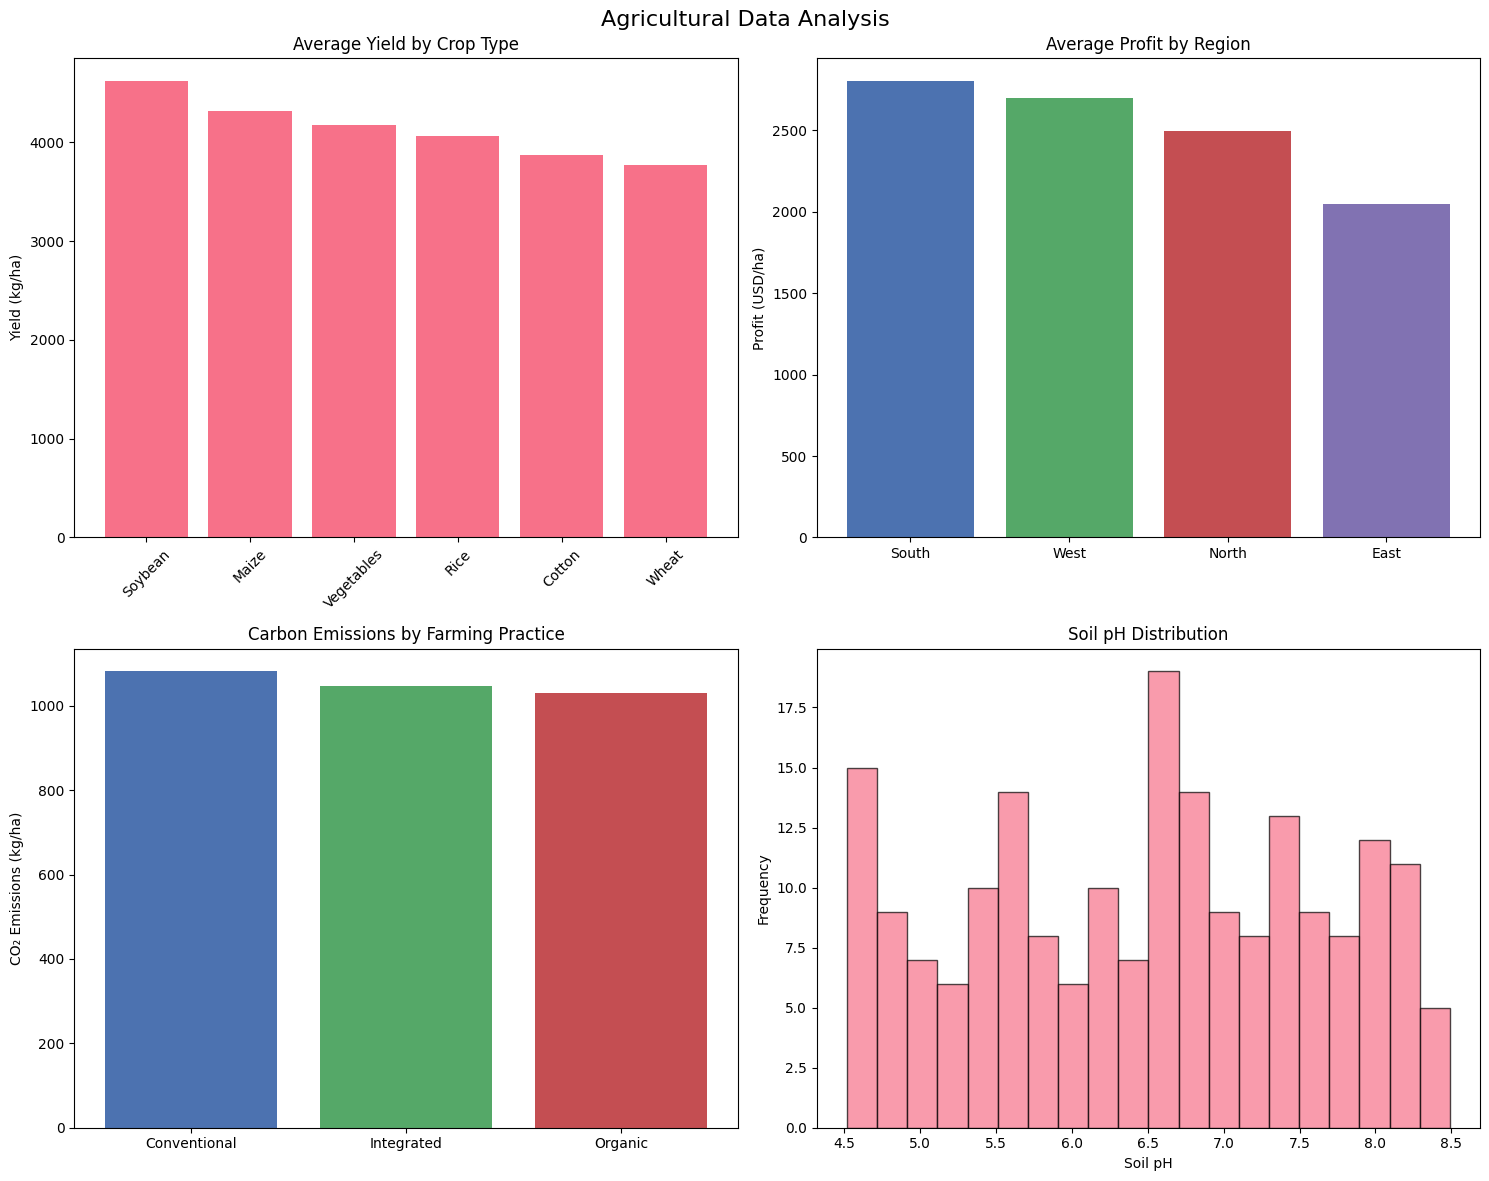

Visualizations saved as 'agricultural_analysis.png'


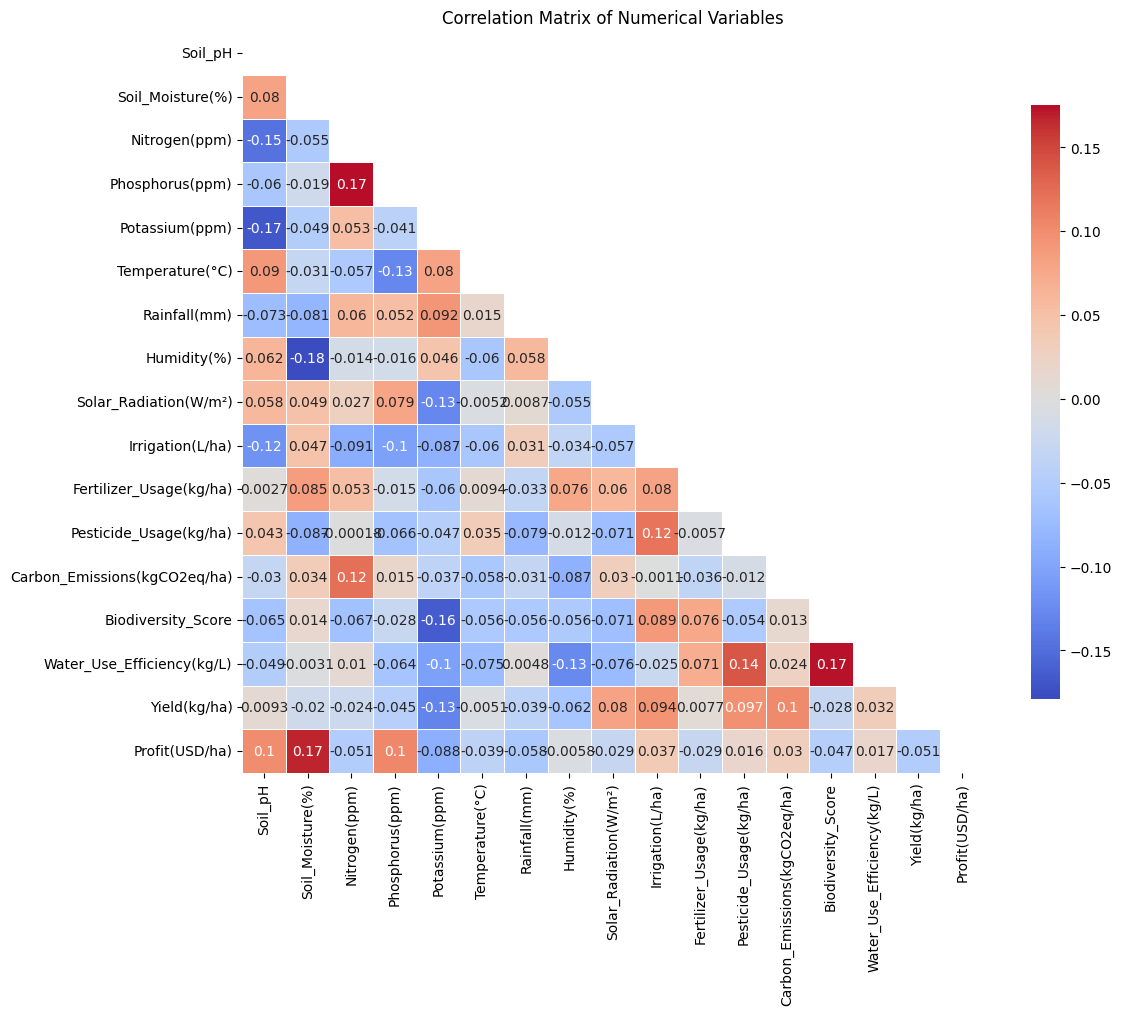

Correlation matrix saved as 'correlation_matrix.png'


In [62]:
analyzer.create_visualizations()

<h2><b> Step: 9</b>- Run the full analysis all at once
 </h2>

AGRICULTURAL DATA ANALYSIS
Dataset Shape: 200 rows, 24 columns

First 5 rows:
  Farm_ID Region   Crop_Type Farming_Practice Soil_Type  Soil_pH  \
0    F001   East       Maize     Conventional      Clay     5.27   
1    F002   West      Cotton          Organic     Sandy     6.46   
2    F003  South        Rice     Conventional     Loamy     5.42   
3    F004  North  Vegetables          Organic     Silty     7.44   
4    F005  North        Rice          Organic      Clay     5.52   

   Soil_Moisture(%)  Nitrogen(ppm)  Phosphorus(ppm)  Potassium(ppm)  ...  \
0              15.4           46.0             19.6           130.7  ...   
1              36.9          108.1             73.8            65.2  ...   
2              25.5           96.9             69.1           168.5  ...   
3              34.0          114.3             60.1           149.0  ...   
4              16.7          101.2             20.9           237.0  ...   

   Irrigation(L/ha)  Fertilizer_Usage(kg/ha)  Pesticide_

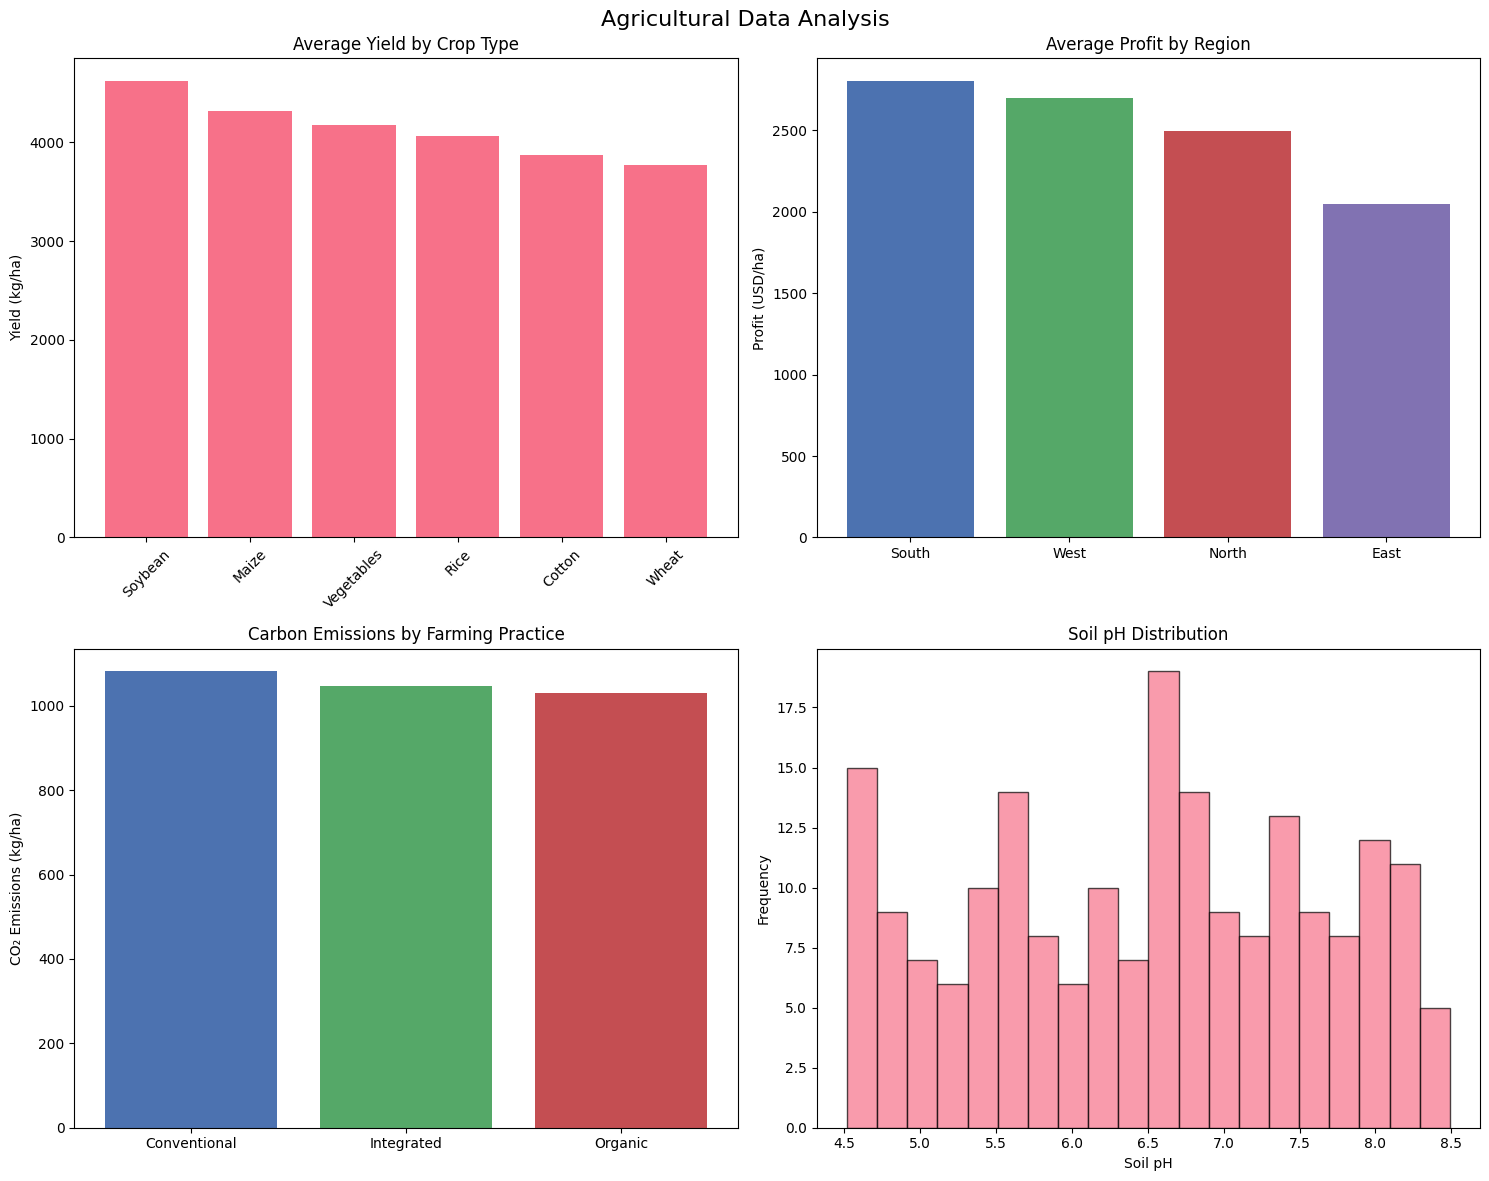

Visualizations saved as 'agricultural_analysis.png'


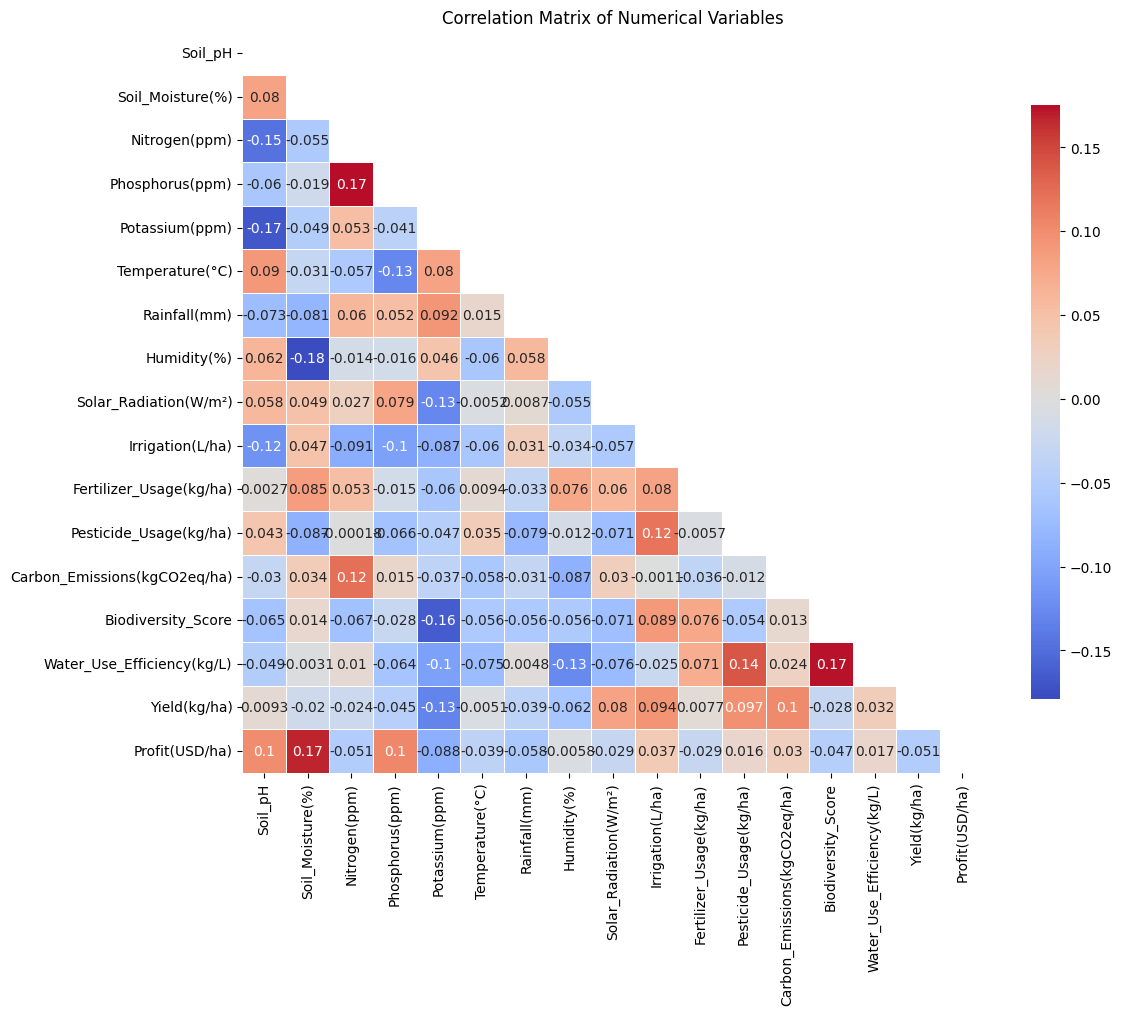

Correlation matrix saved as 'correlation_matrix.png'

ANALYSIS COMPLETE
Summary of key findings:
- The dataset contains information about 200 farms across 4 regions
- Various crop types are represented with different yield and profit levels
- Different farming practices show variations in sustainability metrics
- Check the generated visualizations for more insights


In [63]:
analyzer.run_full_analysis()